In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [55]:
df=pd.read_csv('dataset/income.csv')

In [56]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


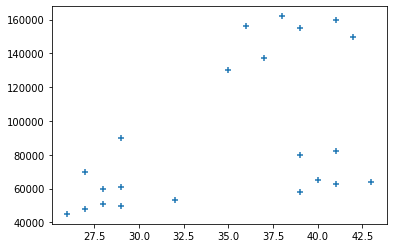

In [57]:
plt.scatter(df['Age'],df['Income($)'],marker='+')

In [58]:
km= KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [60]:
df['cluster']=y_predicted

In [61]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


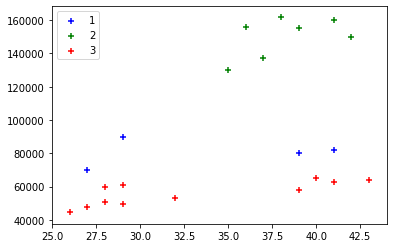

In [62]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
Income1=plt.scatter(df0['Age'],df0['Income($)'],marker='+',color='blue')
Income2=plt.scatter(df1['Age'],df1['Income($)'],marker='+',color='green')
Income3=plt.scatter(df2['Age'],df2['Income($)'],marker='+',color='red')

plt.xlabel='Age'
plt.ylabel='Income($)'
plt.legend([Income1,Income2,Income3],['1','2','3'])

In [63]:
scaler =MinMaxScaler()
scaler2=MinMaxScaler()

In [64]:
scaler.fit(df[['Income($)']])
df['Income($)']=scalar.transform(df[['Income($)']])

In [65]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [67]:
scaler2.fit(df[['Age']])
df['Age']=scaler2.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [68]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [69]:
df['cluster']=y_predicted

In [70]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


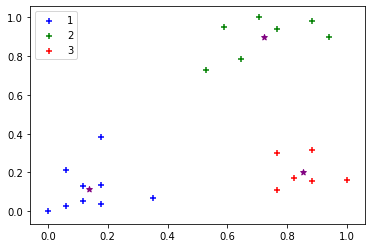

In [74]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
Income1=plt.scatter(df0['Age'],df0['Income($)'],marker='+',color='blue')
Income2=plt.scatter(df1['Age'],df1['Income($)'],marker='+',color='green')
Income3=plt.scatter(df2['Age'],df2['Income($)'],marker='+',color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel='Age'
plt.ylabel='Income($)'
plt.legend([Income1,Income2,Income3],['1','2','3'])

In [72]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])